# Implementing all models 


In [235]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [243]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
# df.set_index('Date',inplace=True)                   #Setting date as index
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['Date'] = df['Date'].str.replace(".","").astype(int)

In [244]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,18122003,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,19122003,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,22122003,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,23122003,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,29122003,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [245]:
X = df[['Open']]
y= (df['Date']) 
y


0       18122003
1       19122003
2       22122003
3       23122003
7       29122003
          ...   
4248    12102020
4249    13102020
4250    14102020
4251    15102020
4252    16102020
Name: Date, Length: 4204, dtype: int32

In [246]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [247]:

from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [248]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

from sklearn.linear_model import SGDRegressor
# SkLearn SGD classifier
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor
DTreeModel = DecisionTreeRegressor(max_depth=100)
DTreeModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=100)

In [249]:

print("LinearRegression intercept" +str(regressor.intercept_))
print("LinearRegression coef" +str(regressor.coef_))

print("SGDRegression intercept" +str(sgd.intercept_))
print("SGDRegression coef" +str(sgd.coef_))


LinearRegression intercept15770203.99910794
LinearRegression coef[18734.21928309]
SGDRegression intercept[15889832.19277676]
SGDRegression coef[56238.00827505]


In [250]:
LR_pred = regressor.predict(X_test)
SGD_pred = sgd.predict(X_test)
Dtree_pred = DTreeModel.predict(X_test)


In [251]:
from sklearn import metrics
print("SGD Regressor")
print('Mean Squared Error :',metrics.mean_squared_error(y_test, sgd.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, sgd.predict(X_test)))
print("Score:", sgd.score(X_test, y_test))
print("\nLinear Regressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))
print("Score:", regressor.score(X_test, y_test))

SGD Regressor
Mean Squared Error : 77816646757278.97
Mean Absolute Error : 7712385.371293838
Score: -0.0005429710603659377

Linear Regressor
Mean Absolute Error: 7711116.402063825
Mean Squared Error: 77780943528446.34
Root Mean Squared Error: 8819350.51624814
Score: -8.390971371019518e-05


In [252]:
from sklearn import metrics
def ModelScoring(name, model): #pass the name of the model, and the model itself
    print(name)
    print('Mean Squared Error :',metrics.mean_squared_error(y_test, model.predict(X_test)))
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print("Score:", model.score(X_test, y_test))
    print()

In [253]:
ModelScoring("SGD Regressor", sgd)
ModelScoring("Linear Regressor", regressor)
ModelScoring("Decision Tree Regressor", DTreeModel)

SGD Regressor
Mean Squared Error : 77816646757278.97
Mean Absolute Error : 7712385.371293838
Root Mean Squared Error: 8821374.4256368
Score: -0.0005429710603659377

Linear Regressor
Mean Squared Error : 77780943528446.34
Mean Absolute Error : 7711116.402063825
Root Mean Squared Error: 8819350.51624814
Score: -8.390971371019518e-05

Decision Tree Regressor
Mean Squared Error : 117651399838072.94
Mean Absolute Error : 8772699.618402207
Root Mean Squared Error: 10846722.999969758
Score: -0.5127262102486507



In [255]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': SGD_pred, 'LR': LR_pred})
#df2.sort_values(by='Date',inplace=True) 

<AxesSubplot:>

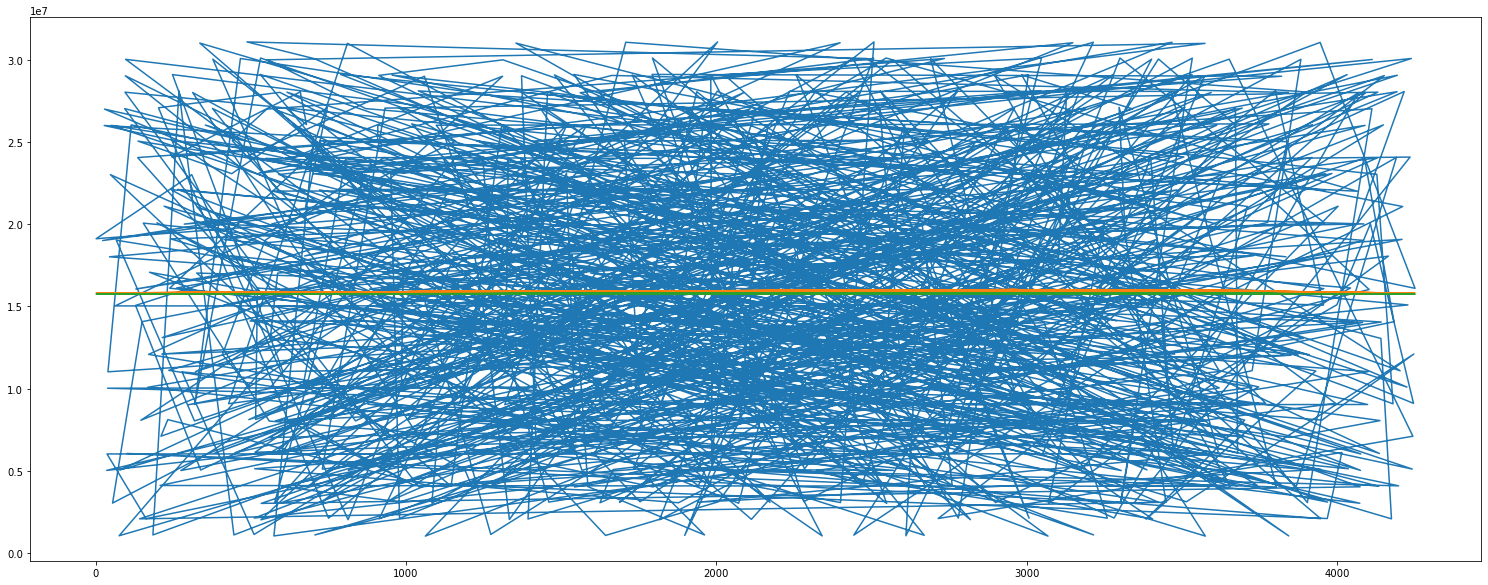

In [256]:
df2['Actual'].plot(figsize=(26,10))
df2['SGD'].plot(figsize=(26,10))
df2['LR'].plot(figsize=(26,10))

<AxesSubplot:>

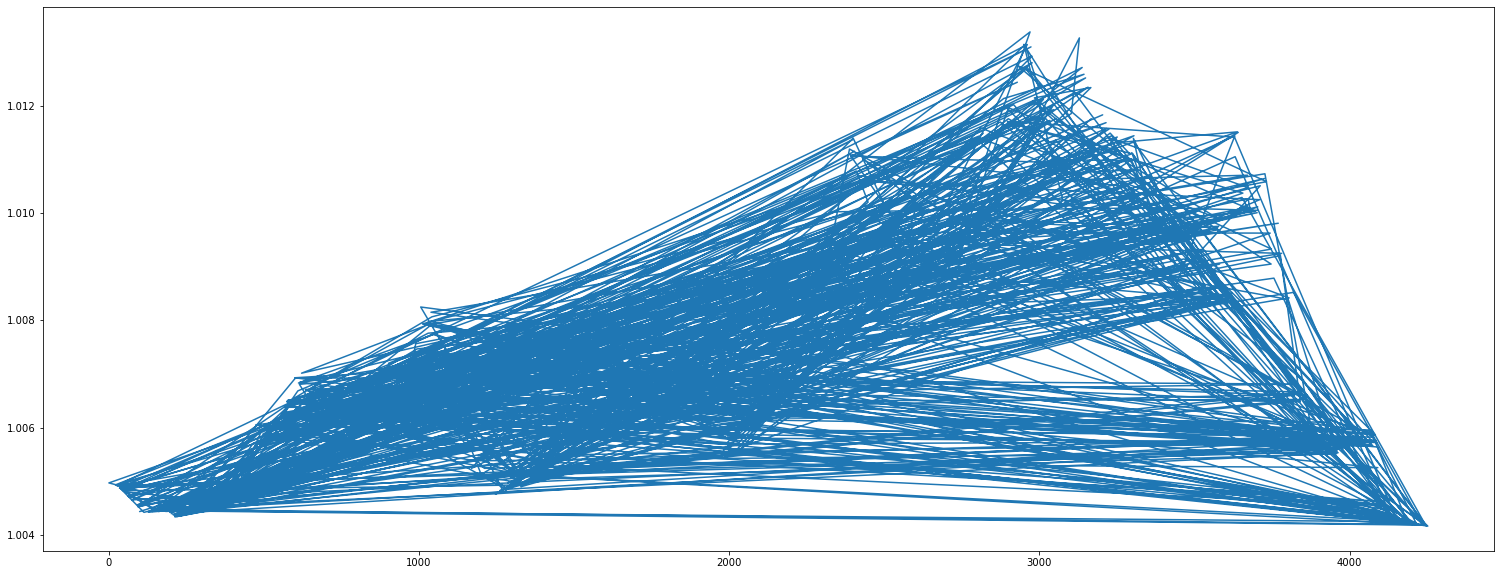

In [257]:
diffSGD_LR = df2['SGD']/df2['LR']
diffSGD_LR.plot(figsize=(26,10))

In [258]:
diffAct_LR = df2['Actual']/df2['LR']
diffAct_SGD = df2['Actual']/df2['SGD']

meanVal = (df2['LR']+df2['SGD'])/2
diffMeanAct = df2['Actual']/meanVal


<AxesSubplot:>

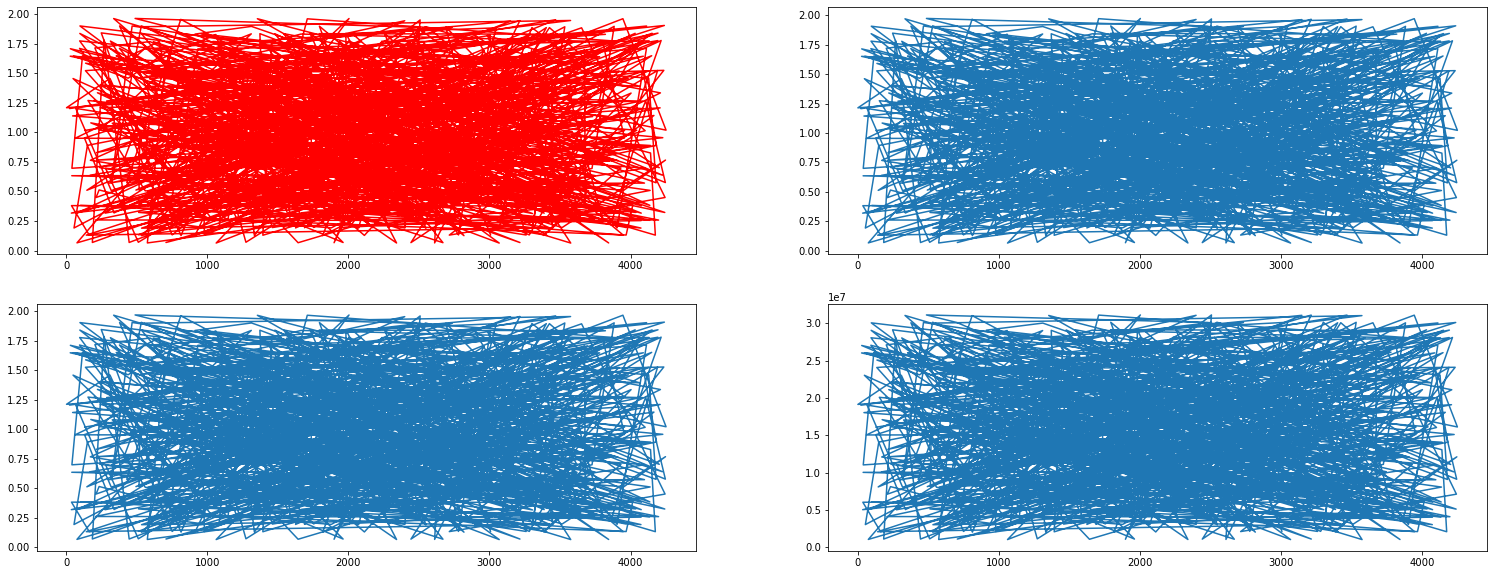

In [259]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

diffAct_SGD.plot(figsize=(26,10), color = "Red", ax=axes[0,0])
diffAct_LR.plot(figsize=(26,10), ax=axes[0,1])
diffMeanAct.plot(figsize=(26,10), ax=axes[1,0])
df2['Actual'].plot(figsize=(26,10), ax=axes[1,1])

## Predict todays closing price by giving todays opening price

In [260]:
#predicts the price according to the selected algorithm
def predictPrice(opening, algorithm):
    prediction = algorithm.predict(opening)
    return prediction

In [261]:
from pandas import DataFrame
#from statistics import mean

def assessDifference(opening, *argv, closing): #The args are the prediction algorithms you want to test on
    opPrice=pd.DataFrame([[opening]])
    opPrice=scaler.transform(opPrice)
    i=0
    predList = []
    for model in argv:
        prediction = predictPrice(opPrice, model)
        print("Model " +str(model) + ": "+ str(prediction), end=" ")
        predList.append(prediction)
        print(f'The prediction is off by {float(closing-prediction)} NOK')
        i+=1
    
    print(f'The mean of the models is {float(findMean(predList))} NOK')

    print(f'The mean of the models are off by {findMeanDifference(closing, predList)} NOK')

def findMean(predictionList):
    return sum(predictionList)/len(predictionList)
    
def findMeanDifference(closing, predictionList):
    return float(closing-findMean(predictionList))

        

In [262]:
list = assessDifference(0.7090, regressor, sgd, DTreeModel, closing=0.6768)

Model LinearRegression(): [15743244.25236401] The prediction is off by -15743243.575564014 NOK
Model SGDRegressor(): [15808902.08100815] The prediction is off by -15808901.404208152 NOK
Model DecisionTreeRegressor(max_depth=100): [13102020.] The prediction is off by -13102019.3232 NOK
The mean of the models is 14884722.111124054 NOK
The mean of the models are off by -14884721.434324054 NOK


In [263]:
assessDifference(14102020, regressor, sgd, DTreeModel, closing=0.6722)

Model LinearRegression(): [4.78527396e+09] The prediction is off by -4785273954.48877 NOK
Model SGDRegressor(): [1.43334009e+10] The prediction is off by -14333400872.28399 NOK
Model DecisionTreeRegressor(max_depth=100): [6082015.] The prediction is off by -6082014.3278 NOK
The mean of the models is 6374918947.70572 NOK
The mean of the models are off by -6374918947.03352 NOK


## Calculating accuracy

How percentually correct is the prediction.

In [ ]:
(actual-predicted)/actual * 100

How often does it correctly asess whether the price will go up or down by closing time, in comparison to the opening time.

In [ ]:
total = 0
correct = 0
for x : df
    
    if y > x && 
